In [3]:
import pandas as pd
import numpy as np

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
import tensorflow as tf


from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import shuffle

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, GRU

2024-03-26 21:14:13.788414: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 21:14:14.671734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# data_path = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/aug_final_df.csv')
# clean_data_path = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df.csv')
merged_data_path = pd.read_csv('merged_df.csv')
non_augmented_path = pd.read_csv('final_df.csv')
augmented_path = pd.read_csv('aug_final_df.csv')

# data_path = pd.read_csv('aug_final_df.csv')
# clean_data_path = pd.read_csv('final_df.csv')
non_augmented_path.drop(columns=['Unnamed: 0', 'Emotions_without_gender'], axis=1, inplace=True)
non_augmented_path.rename(columns={"Emotions_with_gender": "Emotions"}, inplace=True)
df_merged = pd.concat([augmented_path, non_augmented_path], ignore_index=True, sort=False)
augmented_path.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13,Ravdess\03-01-01-01-01-01-01.wav,-562.151506,31.979038,1.889848,8.659115,4.850125,-1.467678,-3.232874,-6.313390,...,0.000007,0.000005,0.000005,3.633485e-06,0.004597,0.015390,-0.033435,0.012520,-0.002898,0.007177
1,5,Ravdess\03-01-01-01-01-01-02.wav,-522.032804,30.843309,-6.888712,0.897592,-5.138569,-6.227784,-7.008630,-8.825021,...,0.000011,0.000011,0.000009,6.912152e-06,-0.021170,0.009388,0.005586,-0.013296,-0.003911,0.006994
2,13,Ravdess\03-01-01-01-01-01-03.wav,-561.167449,41.730094,-3.696491,5.630562,1.918353,-4.579504,-9.961748,-6.453885,...,0.000020,0.000028,0.000017,3.894878e-06,-0.005082,-0.004964,0.005950,0.021505,-0.008038,-0.009597
3,5,Ravdess\03-01-01-01-01-01-04.wav,-631.621801,33.719122,-7.336527,6.547586,-4.442126,-5.229694,-6.480212,-11.788281,...,0.000017,0.000012,0.000006,8.970399e-07,-0.007362,0.007175,-0.012972,0.007889,-0.013610,0.004167
4,13,Ravdess\03-01-01-01-01-01-05.wav,-532.558528,29.025310,9.827110,7.885900,3.647080,-1.234414,-3.232563,-3.385255,...,0.000011,0.000011,0.000010,9.498596e-06,0.008078,0.029084,-0.044486,0.003232,0.006687,0.003168


In [10]:
augmented_path = shuffle(augmented_path)
augmented_path.tail()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
1030,11,Ravdess\03-01-06-02-02-01-23.wav,-378.306928,24.723572,-6.989681,1.626078,0.281118,-7.390796,-8.420931,-7.007860,...,0.001950,0.002131,0.001008,0.000185,-0.005066,0.015442,-0.003998,0.010133,-0.000819,-0.007068
10516,2,Tess\YAF_disgust\YAF_dog_disgust.wav,-321.821920,34.169354,6.580054,-3.071748,-6.719210,-4.830411,-1.521645,-9.492337,...,0.002429,0.002840,0.002435,0.000599,0.027726,0.018919,-0.004672,0.023622,0.001205,0.004118
6270,2,Crema\1060_IEO_DIS_MD.wav,-305.764989,85.166864,23.269081,3.055613,1.117734,6.882415,0.975479,-4.278605,...,0.000310,0.000292,0.000290,0.000301,0.008300,0.040131,0.028473,-0.117610,0.020329,-0.033672
375,4,Ravdess\03-01-03-01-02-02-16.wav,-452.927861,20.542074,-0.525572,2.333825,-2.446664,-10.164739,-12.192976,-11.558467,...,0.000622,0.000582,0.000450,0.000059,-0.010921,0.013641,0.004914,-0.036149,0.011251,-0.002293
7654,11,Crema\1077_DFA_FEA_XX.wav,-414.752469,102.477783,34.341265,38.152917,15.277876,5.883121,-5.917898,-2.255565,...,0.000013,0.000012,0.000012,0.000013,-0.016132,0.021361,-0.086063,0.003753,0.010769,0.006401


In [11]:
X = augmented_path.drop(columns=['Emotions', 'Path'])
y = augmented_path['Emotions']
# https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html


smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

In [12]:
def build_model(input_shape):
    model =  keras.Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_v2(input_shape):
    model = keras.Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_LSTM(input_shape):
    model = keras.Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(128))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_GRU(input_shape):
    model = keras.Sequential()
    model.add(GRU(128, return_sequences=True, input_shape=input_shape))
    model.add(GRU(128, return_sequences=True, input_shape=input_shape))
    model.add(GRU(128))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_LSTM_GRU(input_shape):
    model = keras.Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(GRU(128))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def get_mel_spectrogram(df):
    return df.filter(like='MEL')

In [13]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
print(X_train_smote.shape, X_test_smote.shape, y_train_smote.shape, y_test_smote.shape)

(14028, 173) (3508, 173) (14028,) (3508,)


2024-03-26 21:20:20.848727: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1002 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:81:00.0, compute capability: 8.6
/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


2024-03-26 21:20:22.909458: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0998 - loss: 2.6826 - val_accuracy: 0.1839 - val_loss: 2.3760
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1852 - loss: 2.3549 - val_accuracy: 0.2423 - val_loss: 2.2783
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2354 - loss: 2.2638 - val_accuracy: 0.2306 - val_loss: 2.2940
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2442 - loss: 2.1877 - val_accuracy: 0.2890 - val_loss: 2.1321
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2654 - loss: 2.1594 - val_accuracy: 0.2716 - val_loss: 2.1383
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2683 - loss: 2.1396 - val_accuracy: 0.2730 - val_loss: 2.1259
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2768 - loss: 2.1283 - val_accuracy: 0.2776 - val_loss: 2.1020
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2705 - loss: 2.1219 - val_accuracy: 0.295

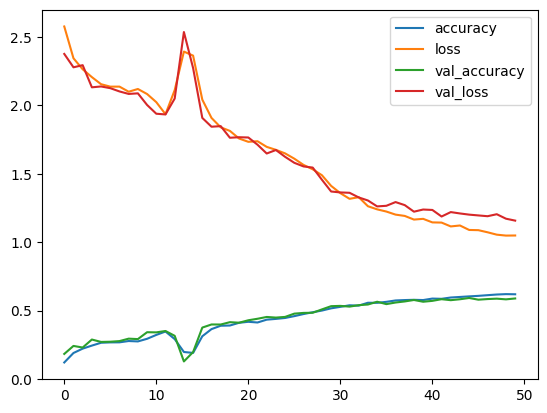

0.5926585793495178


In [14]:

model_smote = build_model((X_train_smote.shape[1], 1))
# Validation split https://youtu.be/dzoh8cfnvnI?si=dL3Xhac5PKAUnbFT
# Shuffle to make the batch random
smote_history = model_smote.fit(X_train_smote, y_train_smote, validation_split=0.2, shuffle=True, epochs=50)

# summarize history for accuracy
pd.DataFrame(smote_history.history).plot()
plt.show()

best_score = max(smote_history.history['val_accuracy'])

print(best_score)


Epoch 1/50


/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0684 - loss: 2.7674 - val_accuracy: 0.1404 - val_loss: 2.4921
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1662 - loss: 2.4470 - val_accuracy: 0.2049 - val_loss: 2.3559
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2250 - loss: 2.3016 - val_accuracy: 0.1532 - val_loss: 2.4659
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1790 - loss: 2.3896 - val_accuracy: 0.2128 - val_loss: 2.3567
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2171 - loss: 2.2709 - val_accuracy: 0.2805 - val_loss: 2.1723
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2595 - loss: 2.1764 - val_accuracy: 0.2944 - val_loss: 2.0983
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2605 - loss: 2.1666 - val_accuracy: 0.3172 - val_loss: 2.0739
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3161 - loss: 2.0402 - val_accuracy: 0.333

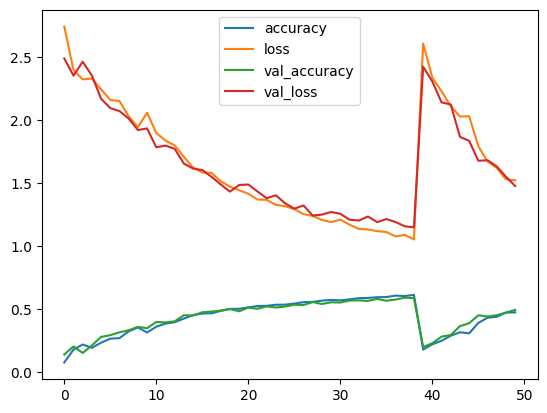

0.5923022031784058


In [16]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
model_ros = build_model((X_train_ros.shape[1], 1))

ros_history = model_ros.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)

# summarize history for accuracy
pd.DataFrame(ros_history.history).plot()
plt.show()

best_score = max(ros_history.history['val_accuracy'])

print(best_score)

Epoch 1/50


/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.2651 - loss: 2.2456 - val_accuracy: 0.4309 - val_loss: 1.7248
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4407 - loss: 1.6874 - val_accuracy: 0.4555 - val_loss: 1.6081
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4905 - loss: 1.5101 - val_accuracy: 0.5125 - val_loss: 1.4291
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5236 - loss: 1.3896 - val_accuracy: 0.4968 - val_loss: 1.4715
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5526 - loss: 1.2922 - val_accuracy: 0.5524 - val_loss: 1.2677
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5737 - loss: 1.2176 - val_accuracy: 0.5805 - val_loss: 1.2210
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6058 - loss: 1.1305 - val_accuracy: 0.5638 - val_loss: 1.2610
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6092 - loss: 1.1239 - val_accuracy: 0.55

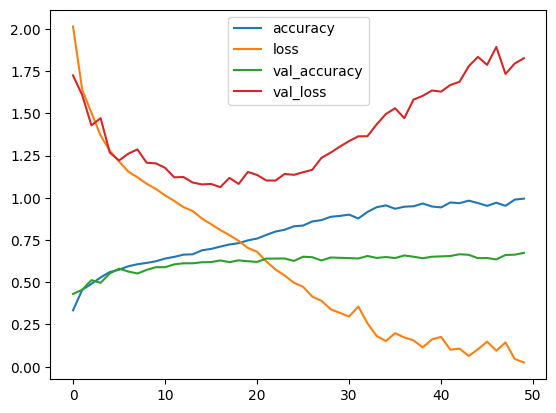

0.6739130616188049


In [18]:

model_smote_v2 = build_model_v2((X_train_smote.shape[1], 1))
# Validation split https://youtu.be/dzoh8cfnvnI?si=dL3Xhac5PKAUnbFT
# Shuffle to make the batch random
smote_history_v2 = model_smote_v2.fit(X_train_smote, y_train_smote, validation_split=0.2, shuffle=True, epochs=50)

# summarize history for accuracy
pd.DataFrame(smote_history_v2.history).plot()
plt.show()

best_score = max(smote_history_v2.history['val_accuracy'])

print(best_score)

Epoch 1/50


/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.2541 - loss: 2.2617 - val_accuracy: 0.4216 - val_loss: 1.7318
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4248 - loss: 1.7101 - val_accuracy: 0.4476 - val_loss: 1.6323
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4768 - loss: 1.5541 - val_accuracy: 0.4932 - val_loss: 1.4929
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5141 - loss: 1.4117 - val_accuracy: 0.5410 - val_loss: 1.3367
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5355 - loss: 1.3139 - val_accuracy: 0.5567 - val_loss: 1.3023
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5584 - loss: 1.2512 - val_accuracy: 0.5606 - val_loss: 1.2764
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5702 - loss: 1.2169 - val_accuracy: 0.5784 - val_loss: 1.2286
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6054 - loss: 1.1288 - val_accuracy: 0.55

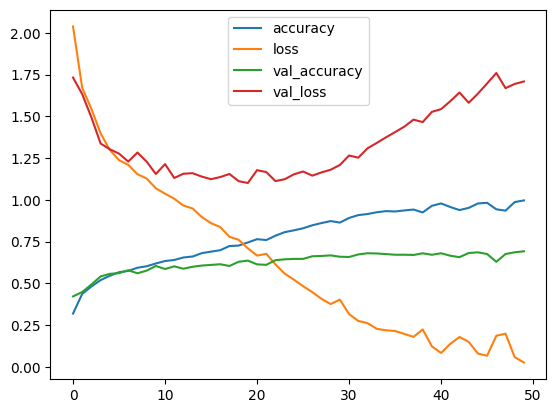

0.6917319893836975


In [20]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
model_ros_v2 = build_model_v2((X_train_ros.shape[1], 1))

ros_history_v2 = model_ros_v2.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)

# summarize history for accuracy
pd.DataFrame(ros_history_v2.history).plot()
plt.show()

best_score = max(ros_history_v2.history['val_accuracy'])

print(best_score)

In [22]:
X_merge = df_merged.drop(columns=['Emotions', 'Path'])
y_merge = df_merged['Emotions']
smote = SMOTE(random_state=42)
X_merge_smote, y_merge_smote = smote.fit_resample(X_merge, y_merge)

ros = RandomOverSampler(random_state=42)
X_merge_ros, y_merge_ros = ros.fit_resample(X_merge, y_merge)

Epoch 1/50


/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


702/702 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.3069 - loss: 2.0729 - val_accuracy: 0.4546 - val_loss: 1.6135
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.4873 - loss: 1.5157 - val_accuracy: 0.5235 - val_loss: 1.3552
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5416 - loss: 1.3169 - val_accuracy: 0.5346 - val_loss: 1.2987
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5840 - loss: 1.1883 - val_accuracy: 0.5857 - val_loss: 1.1665
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.6017 - loss: 1.1310 - val_accuracy: 0.6187 - val_loss: 1.0974
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6254 - loss: 1.0552 - val_accuracy: 0.6288 - val_loss: 1.0685
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6288 - loss: 1.0358 - val_accuracy: 0.6169 - val_loss: 1.0615
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.6474 - loss: 0.9758 - val_accurac

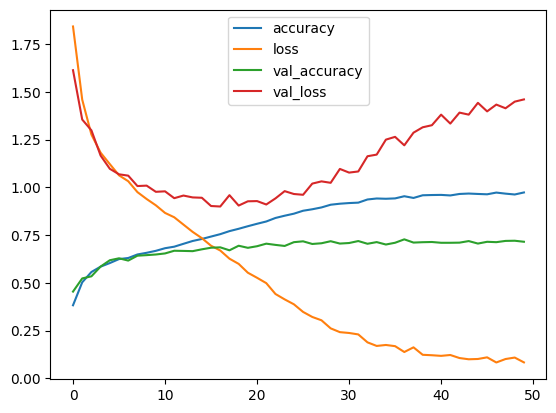

0.7280826568603516


In [23]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_merge_smote, y_merge_smote, test_size=0.2, random_state=42)
model_smote_v3 = build_model_v2((X_train_smote.shape[1], 1))
smote_history_v3 = model_smote_v3.fit(X_train_smote, y_train_smote, validation_split=0.2, shuffle=True, epochs=50)

pd.DataFrame(smote_history_v3.history).plot()
plt.show()

best_score = max(smote_history_v3.history['val_accuracy'])

print(best_score)

Epoch 1/50


/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


702/702 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.2912 - loss: 2.1381 - val_accuracy: 0.4394 - val_loss: 1.6716
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.4624 - loss: 1.5940 - val_accuracy: 0.5310 - val_loss: 1.3884
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.5380 - loss: 1.3341 - val_accuracy: 0.5679 - val_loss: 1.2327
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5775 - loss: 1.2188 - val_accuracy: 0.5748 - val_loss: 1.2030
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5932 - loss: 1.1698 - val_accuracy: 0.5895 - val_loss: 1.1450
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6174 - loss: 1.0782 - val_accuracy: 0.6037 - val_loss: 1.1132
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.6311 - loss: 1.0352 - val_accuracy: 0.6238 - val_loss: 1.0553
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6431 - loss: 0.9888 - val_accurac

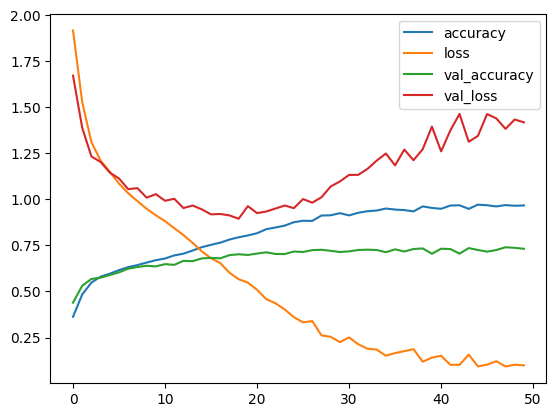

0.7400214076042175


In [25]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_merge_ros, y_merge_ros, test_size=0.2, random_state=42)
model_ros_v3 = build_model_v2((X_train_ros.shape[1], 1))
ros_history_v4 = model_ros_v3.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)

pd.DataFrame(ros_history_v4.history).plot()
plt.show()

best_score = max(ros_history_v4.history['val_accuracy'])

print(best_score)

## Evaluated that ROS showed better results

In [39]:
# data_path = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/aug_final_df.csv')
data_path = augmented_path.copy()
labels = data_path['Emotions']
data_path = get_mel_spectrogram(data_path)
data_path['Emotions'] = labels
# clean_data_path = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df.csv')
# non_augmented_path.drop(columns=['Unnamed: 0', 'Emotions_without_gender'], axis=1, inplace=True)
# non_augmented_path.rename(columns={"Emotions_with_gender": "Emotions"}, inplace=True)
labels = non_augmented_path['Emotions']
non_augmented_path = get_mel_spectrogram(non_augmented_path)
non_augmented_path['Emotions'] = labels

df_mel_merged = pd.concat([data_path, non_augmented_path], ignore_index=True, sort=False)

df_mel_merged = shuffle(df_mel_merged)
df_mel_merged.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127,Emotions
783,0.058117,0.011376,0.022723,0.046832,0.070494,0.293332,0.436840,0.288817,0.149803,0.061920,...,2.245331e-04,2.231510e-04,2.257620e-04,2.321095e-04,2.364713e-04,2.370112e-04,2.048595e-04,2.153214e-04,2.439913e-04,14
8257,0.042484,0.020318,0.018657,0.034491,0.055991,0.155119,0.318006,2.380136,9.436607,5.993798,...,3.945280e-04,3.932166e-04,4.118351e-04,4.296635e-04,4.084342e-04,4.473270e-04,4.061075e-04,3.866177e-04,3.717446e-04,8
229,0.038924,0.019353,0.018627,0.027115,0.030133,0.063272,0.094849,0.160798,0.285488,0.052651,...,4.415937e-09,4.388012e-09,4.287860e-09,4.246927e-09,4.274162e-09,4.530237e-09,4.132040e-09,4.245099e-09,4.200314e-09,6
10929,0.148614,0.122183,0.086736,0.033111,0.027784,0.460090,2.237102,8.447742,2.715964,10.142831,...,1.712560e-02,1.978890e-02,2.563849e-02,2.459138e-02,5.802616e-03,7.439790e-03,1.356529e-02,1.016311e-02,1.035329e-03,6
6732,0.000137,0.000139,0.000130,0.000077,0.000257,0.005649,0.016501,0.090184,0.075235,0.032165,...,1.577773e-04,1.629905e-04,1.668207e-04,2.201920e-04,2.074052e-04,2.740309e-04,2.897638e-04,1.743034e-04,1.179806e-04,4


In [40]:
X_merge = df_mel_merged.drop(columns=['Emotions'])
y_merge = df_mel_merged['Emotions']

ros = RandomOverSampler(random_state=42)
X_merge_ros, y_merge_ros = ros.fit_resample(X_merge, y_merge)

In [41]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_merge_ros, y_merge_ros, test_size=0.2, random_state=42)
model_ros_GRU = build_model_GRU((X_train_ros.shape[1], 1))
model_ros_GRU.summary()


/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 128, 128)       │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 128, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,512 (978.56 KB)

 Trainable params: 250,512 (978.56 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_ros_lstm = build_model_LSTM((X_train_ros.shape[1], 1))
model_ros_lstm.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 128, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 128, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,792 (1.27 MB)

 Trainable params: 331,792 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_ros_LSTM_GRU = build_model_LSTM_GRU((X_train_ros.shape[1], 1))
model_ros_LSTM_GRU.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 128, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 128, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,280 (1.14 MB)

 Trainable params: 299,280 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0984 - loss: 2.6608 - val_accuracy: 0.2022 - val_loss: 2.3053
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1976 - loss: 2.3045 - val_accuracy: 0.2161 - val_loss: 2.2937
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2505 - loss: 2.1998 - val_accuracy: 0.3484 - val_loss: 1.9406
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3803 - loss: 1.8393 - val_accuracy: 0.4902 - val_loss: 1.5045
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5118 - loss: 1.4455 - val_accuracy: 0.5700 - val_loss: 1.2672
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5749 - loss: 1.2542 - val_accuracy: 0.5797 - val_loss: 1.2134
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5993 - loss: 1.1694 - val_accuracy: 0.6003 - val_loss: 1.1661
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6136 - loss: 1.0993 - val_acc

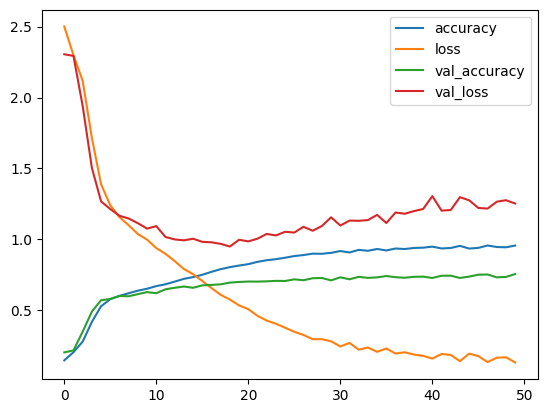

0.9563376903533936


In [47]:
ros_gru_history = model_ros_GRU.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_gru_history.history).plot()
plt.show()

best_score = max(ros_gru_history.history['accuracy'])

print(best_score)

Epoch 1/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.1376 - loss: 2.5435 - val_accuracy: 0.2072 - val_loss: 2.3089
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.1997 - loss: 2.3246 - val_accuracy: 0.2063 - val_loss: 2.3400
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2104 - loss: 2.3026 - val_accuracy: 0.2431 - val_loss: 2.2377
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2355 - loss: 2.2352 - val_accuracy: 0.2482 - val_loss: 2.2026
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2591 - loss: 2.1681 - val_accuracy: 0.2732 - val_loss: 2.1162
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2476 - loss: 2.2253 - val_accuracy: 0.2929 - val_loss: 2.0630
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2125 - loss: 2.3498 - val_accuracy: 0.2587 - val_loss: 2.2013
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2785 - loss: 2.1421 - val_ac

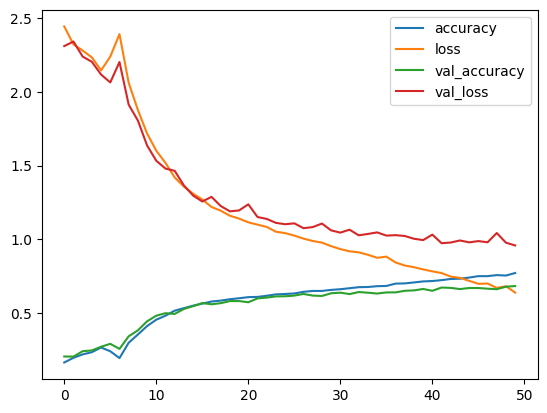

0.7724214792251587


In [49]:
ros_lstm_history = model_ros_lstm.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_lstm_history.history).plot()
plt.show()

best_score = max(ros_lstm_history.history['accuracy'])

print(best_score)

Epoch 1/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1412 - loss: 2.5049 - val_accuracy: 0.2108 - val_loss: 2.2926
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2250 - loss: 2.2395 - val_accuracy: 0.2940 - val_loss: 2.0960
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3234 - loss: 1.9920 - val_accuracy: 0.3576 - val_loss: 1.8871
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3933 - loss: 1.7448 - val_accuracy: 0.4663 - val_loss: 1.5768
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4943 - loss: 1.5016 - val_accuracy: 0.5251 - val_loss: 1.3993
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5392 - loss: 1.3556 - val_accuracy: 0.5526 - val_loss: 1.3099
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5595 - loss: 1.2897 - val_accuracy: 0.5536 - val_loss: 1.2941
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5799 - loss: 1.2271 - val_acc

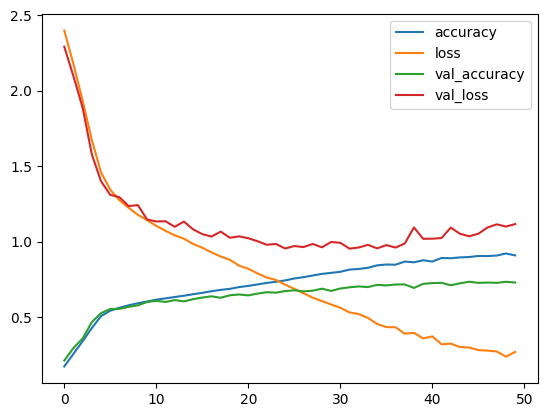

0.9207841157913208


In [51]:
ros_lstm_gru_history = model_ros_LSTM_GRU.fit(X_train_ros, y_train_ros, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_lstm_gru_history.history).plot()
plt.show()

best_score = max(ros_lstm_gru_history.history['accuracy'])

print(best_score)

In [53]:
print(max(ros_gru_history.history['val_accuracy']), max(ros_lstm_history.history['val_accuracy']), max(ros_lstm_gru_history.history['val_accuracy']))

0.7549893260002136 0.6840698719024658 0.7336065769195557


In [54]:
# data_path = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/aug_final_df.csv')
# clean_data_path = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df.csv')

data_path = pd.read_csv('aug_final_df.csv')
non_augmented_path = pd.read_csv('final_df.csv')
non_augmented_path.drop(columns=['Unnamed: 0', 'Emotions_without_gender'], axis=1, inplace=True)
non_augmented_path.rename(columns={"Emotions_with_gender": "Emotions"}, inplace=True)
df_merged = pd.concat([data_path, non_augmented_path], ignore_index=True, sort=False)
df_merged = shuffle(df_merged)
df_merged.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
10921,4,Tess\YAF_happy\YAF_far_happy.wav,-289.812215,36.762607,-21.957014,-0.332465,-13.869732,-14.271562,-6.220355,-20.949377,...,0.006696,0.010833,0.007599,0.001011,0.027594,0.019197,-0.002168,-0.010946,-0.015897,-0.021824
2972,14,Crema\1019_TSI_SAD_XX.wav,-354.012737,73.183573,36.948667,41.692688,10.436942,16.778428,-3.008672,-4.794418,...,0.000075,0.000076,0.000076,0.000074,-0.033951,-0.014516,-0.092651,-0.029813,0.020732,-0.005590
1087,2,Ravdess\03-01-07-01-01-02-08.wav,-557.020439,27.177927,6.653738,2.992721,-1.433473,-1.739870,-7.132345,-7.061899,...,0.000012,0.000009,0.000006,0.000005,-0.047859,0.024112,-0.029781,-0.002355,0.003162,0.008794
21508,5,Tess\OAF_neutral\OAF_sail_neutral.wav,-496.185600,48.013718,17.239172,7.657945,5.633902,9.196605,-5.422578,-9.647004,...,0.000084,0.000060,0.000032,0.000003,0.041469,-0.067910,0.116926,-0.211891,0.057964,0.029695
3165,8,Crema\1022_IOM_ANG_XX.wav,-160.717575,37.702481,-0.515768,14.369402,-1.173600,-11.732804,0.593210,-3.632815,...,0.012262,0.011947,0.011716,0.012176,0.033490,-0.012491,-0.001795,-0.023803,-0.002872,-0.009349


In [55]:
X_merge = df_merged.drop(columns=['Emotions', 'Path'])
y_merge = df_merged['Emotions']

ros = RandomOverSampler(random_state=42)
X_merge_full, y_merge_full = ros.fit_resample(X_merge, y_merge)

In [56]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_merge_full, y_merge_full, test_size=0.2, random_state=42)
model_ros_full_GRU = build_model_GRU((X_train_full.shape[1], 1))
model_ros_full_lstm = build_model_LSTM((X_train_full.shape[1], 1))
model_ros_full_LSTM_GRU = build_model_LSTM_GRU((X_train_full.shape[1], 1))

/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
X_merge.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
10921,-289.812215,36.762607,-21.957014,-0.332465,-13.869732,-14.271562,-6.220355,-20.949377,-0.536611,-7.348534,...,0.006696,0.010833,0.007599,0.001011,0.027594,0.019197,-0.002168,-0.010946,-0.015897,-0.021824
2972,-354.012737,73.183573,36.948667,41.692688,10.436942,16.778428,-3.008672,-4.794418,-7.369144,-2.578117,...,0.000075,0.000076,0.000076,0.000074,-0.033951,-0.014516,-0.092651,-0.029813,0.020732,-0.005590
1087,-557.020439,27.177927,6.653738,2.992721,-1.433473,-1.739870,-7.132345,-7.061899,-5.029673,-1.416796,...,0.000012,0.000009,0.000006,0.000005,-0.047859,0.024112,-0.029781,-0.002355,0.003162,0.008794
21508,-496.185600,48.013718,17.239172,7.657945,5.633902,9.196605,-5.422578,-9.647004,-14.225814,-0.019301,...,0.000084,0.000060,0.000032,0.000003,0.041469,-0.067910,0.116926,-0.211891,0.057964,0.029695
3165,-160.717575,37.702481,-0.515768,14.369402,-1.173600,-11.732804,0.593210,-3.632815,-7.986151,-0.693566,...,0.012262,0.011947,0.011716,0.012176,0.033490,-0.012491,-0.001795,-0.023803,-0.002872,-0.009349


Epoch 1/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.1152 - loss: 2.6597 - val_accuracy: 0.2871 - val_loss: 2.1610
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.2934 - loss: 2.1061 - val_accuracy: 0.3359 - val_loss: 2.0092
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3608 - loss: 1.9340 - val_accuracy: 0.4416 - val_loss: 1.6927
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4538 - loss: 1.6209 - val_accuracy: 0.4952 - val_loss: 1.4792
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5259 - loss: 1.3628 - val_accuracy: 0.5584 - val_loss: 1.2868
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5787 - loss: 1.2208 - val_accuracy: 0.5725 - val_loss: 1.2393
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5980 - loss: 1.1401 - val_accuracy: 0.6037 - val_loss: 1.1310
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6258 - loss: 1.0621 - 

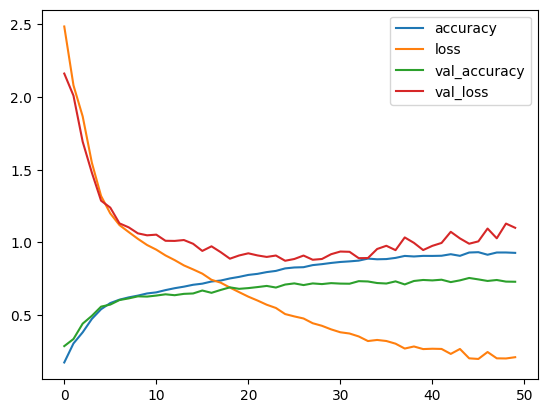

0.9328135251998901


In [58]:
ros_full_gru_history = model_ros_full_GRU.fit(X_train_full, y_train_full, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_full_gru_history.history).plot()
plt.show()

best_score = max(ros_full_gru_history.history['accuracy'])

print(best_score)

Epoch 1/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.1445 - loss: 2.4984 - val_accuracy: 0.2425 - val_loss: 2.2899
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.2459 - loss: 2.2395 - val_accuracy: 0.2582 - val_loss: 2.2494
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.2404 - loss: 2.2566 - val_accuracy: 0.2448 - val_loss: 2.1756
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.1753 - loss: 2.4565 - val_accuracy: 0.1292 - val_loss: 2.6115
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.1612 - loss: 2.5377 - val_accuracy: 0.1388 - val_loss: 2.6747
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.1927 - loss: 2.4233 - val_accuracy: 0.2341 - val_loss: 2.2710
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.2296 - loss: 2.2960 - val_accuracy: 0.2311 - val_loss: 2.2758
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.2461 - loss: 2.2283 - 

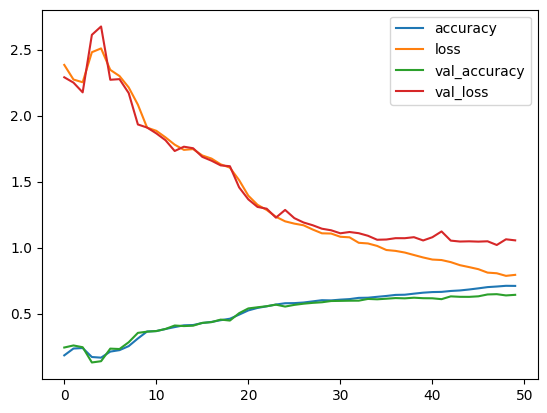

0.7100467681884766


In [60]:
ros_full_lstm_history = model_ros_full_lstm.fit(X_train_full, y_train_full, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_full_lstm_history.history).plot()
plt.show()

best_score = max(ros_full_lstm_history.history['accuracy'])

print(best_score)

Epoch 1/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.1263 - loss: 2.5697 - val_accuracy: 0.2056 - val_loss: 2.3517
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.2471 - loss: 2.2458 - val_accuracy: 0.2623 - val_loss: 2.2106
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.2458 - loss: 2.2208 - val_accuracy: 0.3533 - val_loss: 1.9371
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.3611 - loss: 1.9036 - val_accuracy: 0.3897 - val_loss: 1.8358
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.3968 - loss: 1.7899 - val_accuracy: 0.4125 - val_loss: 1.7334
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4418 - loss: 1.6762 - val_accuracy: 0.4809 - val_loss: 1.5732
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4849 - loss: 1.5350 - val_accuracy: 0.5103 - val_loss: 1.4275
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5218 - loss: 1.3937 - 

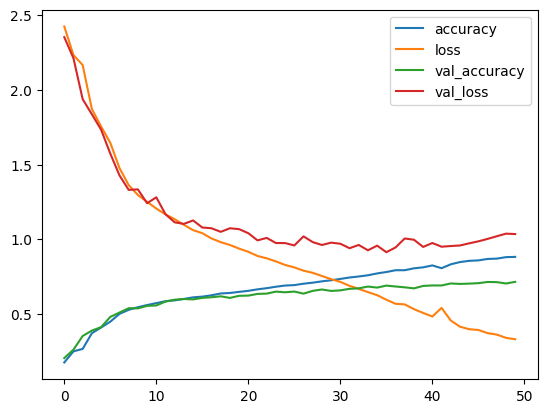

0.8825128078460693


In [62]:
ros_full_lstm_gru_history = model_ros_full_LSTM_GRU.fit(X_train_full, y_train_full, validation_split=0.2, shuffle=True, epochs=50)
pd.DataFrame(ros_full_lstm_gru_history.history).plot()
plt.show()

best_score = max(ros_full_lstm_gru_history.history['accuracy'])

print(best_score)

In [64]:
print(max(ros_full_gru_history.history['val_accuracy']), max(ros_full_lstm_history.history['val_accuracy']), max(ros_full_lstm_gru_history.history['val_accuracy']))

0.7555238604545593 0.6466500163078308 0.7154312133789062


In [65]:
def create_model(input_shape, hidden_size, learning_rate, num_classes=16):

    model = keras.Sequential()
    model.add(GRU(units=hidden_size, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=hidden_size, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=hidden_size))

    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

    # Use categorical crossentropy if labels are one hot encoded
    # Use sparse categorical crossentropy if labels are label encoded meaning they are represented by integers
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Set the batch_size parameter for model.fit
    model.batch_size = 32

    return model

def create_model_final(input_shape, hidden_size, learning_rate,):
    model = keras.Sequential()
    model.add(GRU(units=hidden_size, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=hidden_size, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=hidden_size))
    model.add(Dense(16, activation='softmax'))

    optimiser = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# #X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_merge_full, y_merge_full, test_size=0.2, random_state=42)
# X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# # Define the hyperparameters search space
# hyperparam_distribution_range = {
#     'learning_rate': [0.0001, 0.001],
#     'hidden_size': [128]
# }

# best_accuracy = 0.0
# best_hyperparameters = {}

# for learning_rate in hyperparam_distribution_range['learning_rate']:
#     for hidden_size in hyperparam_distribution_range['hidden_size']:
#         print(hidden_size, learning_rate)
#         # Build the model
#         model = create_model_final((X_train_val.shape[1],1), hidden_size, learning_rate)

#         # Train the model
#         model.fit(X_train_val, y_train_val, epochs=100, verbose=0)

#         # Evaluate the model on the test data
#         test_loss, test_acc = model.evaluate(X_test_val, y_test_val)

#         # Check if this model has the best accuracy so far
#         if test_acc > best_accuracy:
#             best_accuracy = test_acc
#             best_hyperparameters = {
#                 'hidden_size': hidden_size,
#                 'learning_rate': learning_rate,
#             }

# # Print the best hyperparameters and accuracy
# print("Best Hyperparameters:")
# print(best_hyperparameters)
# print("Best Accuracy:", best_accuracy)

128 0.0001
176/176 [==============================] - 3s 9ms/step - loss: 0.9596 - accuracy: 0.6563
128 0.001
176/176 [==============================] - 4s 13ms/step - loss: 1.2596 - accuracy: 0.7578
Best Hyperparameters:
{'hidden_size': 128, 'learning_rate': 0.001}
Best Accuracy: 0.7578403353691101


Epoch 1/80


/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


877/877 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.0756 - loss: 2.7991
Epoch 2/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.1705 - loss: 2.4391
Epoch 3/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.3077 - loss: 2.0366
Epoch 4/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.3805 - loss: 1.8379
Epoch 5/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4642 - loss: 1.5760
Epoch 6/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5077 - loss: 1.4180
Epoch 7/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5386 - loss: 1.3362
Epoch 8/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5481 - loss: 1.3032
Epoch 9/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5562 - loss: 1.2585
Epoch 10/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5723 - loss: 1.2365
Epoch 11/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5740 - loss: 1.2024
Epoch 12/80
877/877 ━━━━━━━━━━━━━━━━━━━━ 

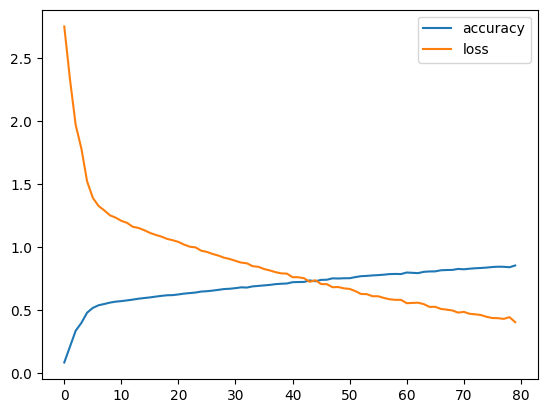

In [66]:
#X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_merge_full, y_merge_full, test_size=0.2, random_state=42)
final_ros_model = create_model_final((X_train_full.shape[1],1), 128, 0.001)


final_ros_history = final_ros_model.fit(X_train_full, y_train_full, epochs=80)
pd.DataFrame(final_ros_history.history).plot()
plt.show()

In [67]:
loss, acc = final_ros_model.evaluate(X_test_full, y_test_full)
print(f"Test accuracy: {acc:.4f}")
final_ros_model.save('final_ros_model.keras')

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7186 - loss: 0.9607
Test accuracy: 0.7125


Epoch 1/80


/common/home/projectgrps/IS460/IS460G6/jupyterlab-venv-tf-py311/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.1060 - loss: 2.6763 - val_accuracy: 0.2605 - val_loss: 2.2047
Epoch 2/80
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.2908 - loss: 2.1263 - val_accuracy: 0.3329 - val_loss: 1.9873
Epoch 3/80
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3676 - loss: 1.8845 - val_accuracy: 0.4629 - val_loss: 1.5378
Epoch 4/80
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4865 - loss: 1.4841 - val_accuracy: 0.5267 - val_loss: 1.3752
Epoch 5/80
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5496 - loss: 1.3050 - val_accuracy: 0.5843 - val_loss: 1.2187
Epoch 6/80
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5844 - loss: 1.1883 - val_accuracy: 0.5884 - val_loss: 1.1785
Epoch 7/80
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6071 - loss: 1.1175 - val_accuracy: 0.6149 - val_loss: 1.1278
Epoch 8/80
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6297 - loss: 1.0370 - val_accurac

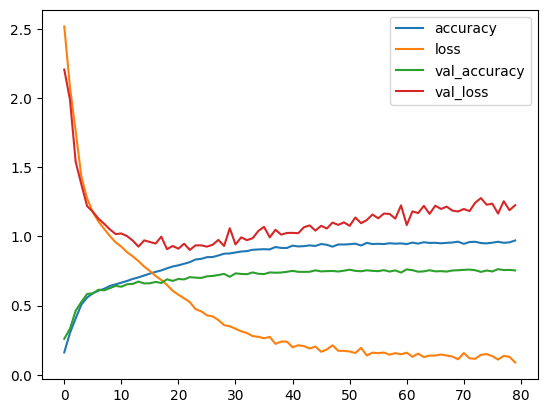

In [68]:
#X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_merge_full, y_merge_full, test_size=0.2, random_state=42)
final_ros_model = create_model_final((X_train_full.shape[1],1), 128, 0.001)


final_ros_history = final_ros_model.fit(X_train_full, y_train_full, validation_split=0.2, epochs=80)
pd.DataFrame(final_ros_history.history).plot()
plt.show()

In [69]:
loss, acc = final_ros_model.evaluate(X_test_full, y_test_full)
print(f"Test accuracy: {acc:.4f}")

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7470 - loss: 1.3290
Test accuracy: 0.7540


In [70]:
# load model 
from keras.models import load_model

# Load the saved model
loaded_model = load_model("final_ros_model.keras")

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


Text(0.5, 58.5815972222222, 'Predicted emotion')

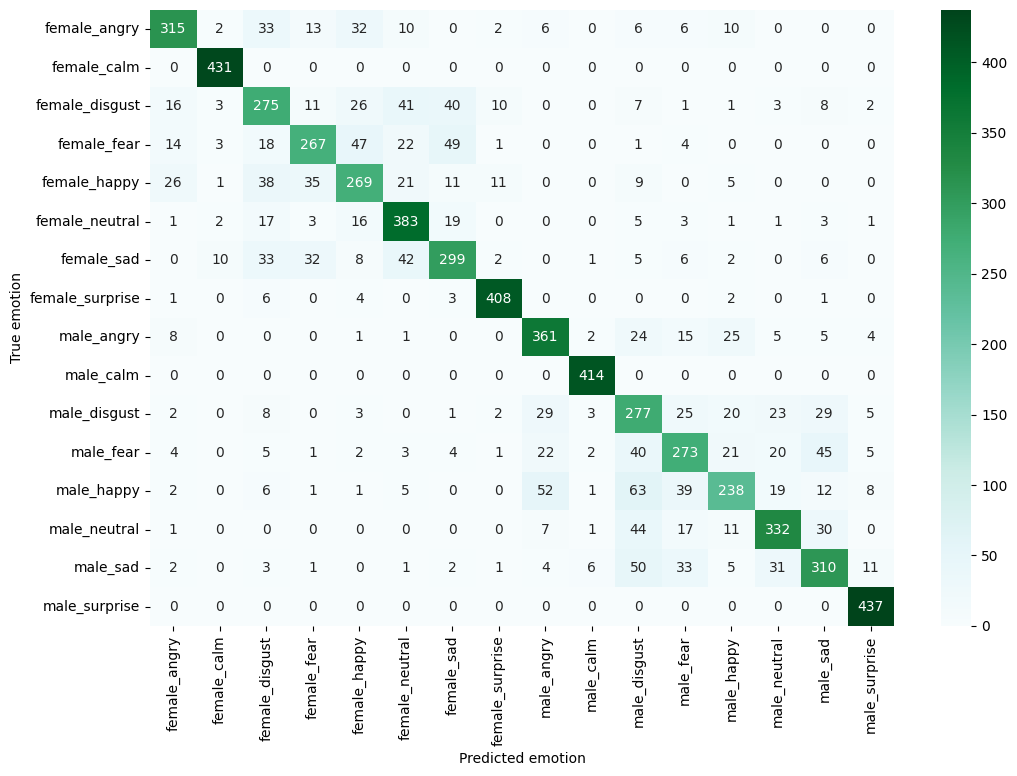

In [71]:
from sklearn.metrics import confusion_matrix

# Get predicted labels
y_pred = final_ros_model.predict(X_test_full)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_full, y_pred_class)

index = ['female_angry', 'female_calm', 'female_disgust', 'female_fear', 'female_happy', 'female_neutral', 'female_sad', 'female_surprise',
         'male_angry', 'male_calm', 'male_disgust', 'male_fear', 'male_happy', 'male_neutral', 'male_sad', 'male_surprise']
columns = ['female_angry', 'female_calm', 'female_disgust', 'female_fear', 'female_happy', 'female_neutral', 'female_sad', 'female_surprise',
         'male_angry', 'male_calm', 'male_disgust', 'male_fear', 'male_happy', 'male_neutral', 'male_sad', 'male_surprise']


# Plot confusion matrix
cm_df = pd.DataFrame(cm,index,columns)
plt.figure(figsize=(12,8))
ax = plt.axes()

sns.heatmap(cm_df, ax = ax, cmap = 'BuGn', fmt="d", annot=True)
ax.set_ylabel('True emotion')
ax.set_xlabel('Predicted emotion')

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test_full, y_pred_class, average='weighted')
recall = recall_score(y_test_full, y_pred_class, average='weighted')
f1 = f1_score(y_test_full, y_pred_class, average='weighted')

print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print("\n")

# For a detailed classification report including precision, recall, f1-score per class
print(classification_report(y_test_full, y_pred_class, target_names=index))

Precision: 0.7538375288934781, Recall: 0.7539558089807555, F1-Score: 0.7518024194398748


                 precision    recall  f1-score   support

   female_angry       0.80      0.72      0.76       435
    female_calm       0.95      1.00      0.98       431
 female_disgust       0.62      0.62      0.62       444
    female_fear       0.73      0.63      0.68       426
   female_happy       0.66      0.63      0.64       426
 female_neutral       0.72      0.84      0.78       455
     female_sad       0.70      0.67      0.68       446
female_surprise       0.93      0.96      0.95       425
     male_angry       0.75      0.80      0.77       451
      male_calm       0.96      1.00      0.98       414
   male_disgust       0.52      0.65      0.58       427
      male_fear       0.65      0.61      0.63       448
     male_happy       0.70      0.53      0.60       447
   male_neutral       0.76      0.75      0.76       443
       male_sad       0.69      0.67      0.68       4

In [74]:
# import metrics from sklearn library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Possible values for average paramter: micro, macro, weighted, samples

# Compute accuracy
accuracy = accuracy_score(y_test_full, y_pred_class)
print(f'Accuracy: {accuracy}')

# Compute precision
precision = precision_score(y_test_full, y_pred_class, average='weighted')
print(f'Precision: {precision}')

# Compute recall
recall = recall_score(y_test_full, y_pred_class, average='weighted')
print(f'Recall: {recall}')

# Compute F1 score
f1 = f1_score(y_test_full, y_pred_class, average='weighted')
print(f'F1-score: {f1}')

Accuracy: 0.7539558089807555
Precision: 0.7538375288934781
Recall: 0.7539558089807555
F1-score: 0.7518024194398748


In [75]:
# Test set prediction accuracy rates

values = cm.diagonal()
row_sum = np.sum(cm,axis=1)
acc = values / row_sum

print('Test set predicted emotions accuracy:')
for e in range(0, len(values)):
    print(index[e],':', f"{(acc[e]):0.4f}")

Test set predicted emotions accuracy:
female_angry : 0.7241
female_calm : 1.0000
female_disgust : 0.6194
female_fear : 0.6268
female_happy : 0.6315
female_neutral : 0.8418
female_sad : 0.6704
female_surprise : 0.9600
male_angry : 0.8004
male_calm : 1.0000
male_disgust : 0.6487
male_fear : 0.6094
male_happy : 0.5324
male_neutral : 0.7494
male_sad : 0.6739
male_surprise : 1.0000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>